In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [5]:
boston=datasets.load_boston()

In [8]:
feature_names= np.array(boston.feature_names)
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
x=np.array(boston.data)
y=np.array(boston.target)

In [10]:
print(x.shape)
y.shape


(506, 13)


(506,)

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [12]:
# feature scaling
# using the RobustScaler() -> works well with outliers

rs_x = RobustScaler()
rs_y = RobustScaler()

In [13]:
X_train = rs_x.fit_transform(x_train)
X_test = rs_x.transform(x_test)

In [14]:
Y_train = rs_y.fit_transform(y_train.reshape(-1, 1))
Y_test = rs_y.transform(y_test.reshape(-1, 1))

In [15]:
Y_train = Y_train.reshape(-1, )
Y_test = Y_test.reshape(-1, )
print(Y_train.shape, Y_test.shape)

(404,) (102,)


In [16]:
clf=LinearRegression()

In [20]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
Y_pred = clf.predict(X_test)

In [23]:
print("Accuracy on training data : ",clf.score(X_train, Y_train) )

Accuracy on training data :  0.732573852596238


In [24]:
print("Accuracy on testing data : ",clf.score(X_test, Y_test))

Accuracy on testing data :  0.7673858346379564


In [25]:
print("Mean squared error : ", mean_squared_error(Y_test, Y_pred))

Mean squared error :  0.3097588369638548


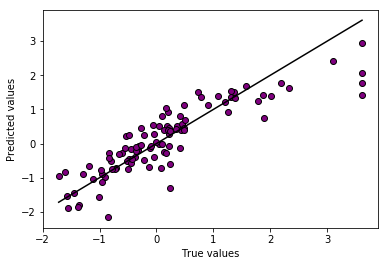

In [26]:
plt.scatter(Y_test, Y_pred, color="purple", edgecolors=(0, 0, 0))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()